In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Preprocessing the Dataset**


In [6]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Exploratory Data Analysis**

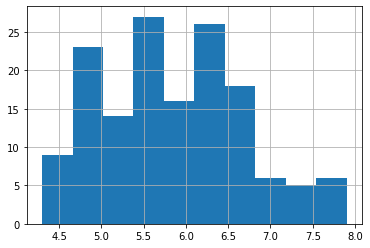

In [7]:
df['sepal_length'].hist()

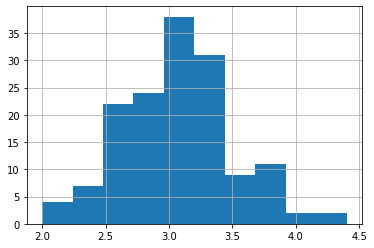

In [8]:
df['sepal_width'].hist()

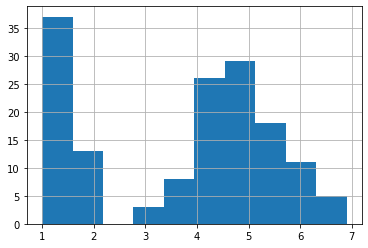

In [9]:
df['petal_length'].hist()

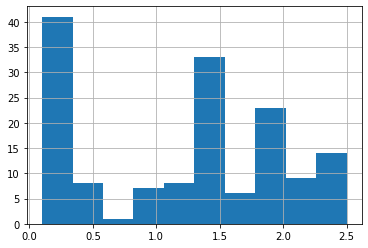

In [10]:
df['petal_width'].hist()

In [11]:
#scatterplot
colors=['red','blue','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

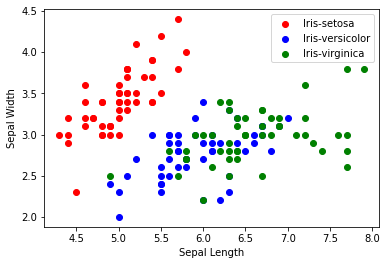

In [12]:
for i in range(3):
  x=df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

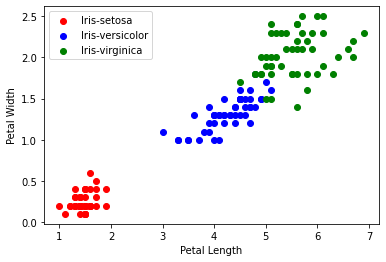

In [13]:
for i in range(3):
  x=df[df['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

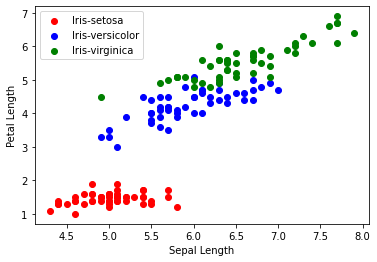

In [14]:
for i in range(3):
  x=df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

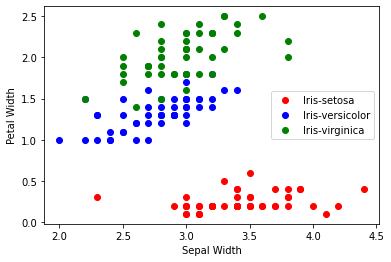

In [15]:
for i in range(3):
  x=df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

In [16]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#df['species']= label_encoder.fit_transform(df['species'])
#df['species'].unique()


In [17]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


Support Vector Machine

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 0  0 13]
 [ 0  0 16]
 [ 0  0  9]]
Accuracy: 36.67 %
Standard Deviation: 3.16 %


Tuned SVM


In [20]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
svc_params = {"kernel": ["rbf", "linear"],
             "C": [0.001, 0.01, 0.1, 1, 10, 50, 100],}
gridcv_model = GridSearchCV(svc, svc_params, cv = 10).fit(X_train, y_train)
gridcv_model.best_params_


{'C': 1, 'kernel': 'linear'}

In [21]:
from sklearn.metrics import accuracy_score
svc_tuned = SVC(C=0.1, kernel = "linear").fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred)
print("SVC Tuned Score is", accuracy_tuned)


SVC Tuned Score is 0.9736842105263158


KNN

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Default score is", accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)


KNN Default score is 0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Tuned KNN


In [23]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors" : np.arange(1,20)}
gridcv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)      
gridcv_model.best_params_

{'n_neighbors': 6}

In [24]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11)
knn_tuned.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred)
print("KNN tuned score is", accuracy_tuned)
cm = confusion_matrix(y_test, y_pred)
print(cm)

KNN tuned score is 0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Random Forest Classifier

```
# This is formatted as code
```



In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 23)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Default Model Score is : ", accuracy)

Random Forest Default Model Score is :  0.9736842105263158


Tuned Random Forest Classifier

In [26]:
rf_tuned = RandomForestClassifier(criterion = "gini", 
                                  min_samples_leaf = 2, min_samples_split = 5,
                                 n_estimators = 10, random_state = 23).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred)
print("Random Forest Tuned Model Score is : ", accuracy_tuned)




Random Forest Tuned Model Score is :  0.9736842105263158


Ensemble Model

In [27]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
bag_clf = BaggingClassifier(base_estimator=rf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train,y_train),bag_clf.score(X_test,y_test)




(0.9821428571428571, 0.9736842105263158)

In [30]:
ad = AdaBoostClassifier(n_estimators=100, learning_rate=0.03)
ad.fit(X_train, y_train)
ad.score(X_train, y_train), ad.score(X_test, y_test)

(0.9375, 0.8947368421052632)

In [31]:
y_pred = classifier.predict(X_test)
y_pred[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [32]:
y_test[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [45]:
from sklearn import ensemble
models = []
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('Bagging Classifier',ensemble.BaggingClassifier()))
models.append(('AdaBoost Classifier',ensemble.AdaBoostClassifier()))

Comparing the Results

In [46]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
 
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


SVM: 0.964394 (0.059656)
KNN: 0.955303 (0.060459)
RFC: 0.946970 (0.059459)
Bagging Classifier: 0.938636 (0.068304)
AdaBoost Classifier: 0.938636 (0.054886)
